# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
'''nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93
'''

"nltk.download('vader_lexicon')\nimport nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n\n# import nltk\n# nltk.download('vader_lexicon')\n\nsid = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with f

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

#CODE

##SET-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pickle
from tqdm import tqdm
import os
'''
from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
'''
import nltk
nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AAIC/Assignments/13.Apply GBDT on Donors Choose dataset/practice/preprocessed_data.csv')
#y = data['project_is_approved'].values
#x = data.drop(['project_is_approved'], axis=1)


In [ ]:
data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'], axis=1)

In [ ]:
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)

In [ ]:
cat_feat = ['school_state', 'teacher_prefix', 'project_grade_category','clean_categories', 'clean_subcategories']
num_feat = ['teacher_number_of_previously_posted_projects', 'price']


In [ ]:
def response_coding_cat_feat(cat_feat,data):
  q = {}
  l = list()
  for col in cat_feat:
    d = {}
    df = pd.DataFrame(columns=[col+'_0',col+'_1'],index=data.index)
    cat_values = dict(data[col].value_counts()).keys()
    for i in cat_values:
      dummy_df = data[data[col]==i]
      d[i] = {}
      d[i][0] = (dummy_df[dummy_df['project_is_approved']==0].shape[0])/(dummy_df.shape[0])
      d[i][1] = (dummy_df[dummy_df['project_is_approved']==1].shape[0])/(dummy_df.shape[0])
      df[col+'_0'][dummy_df.index] = (dummy_df[dummy_df['project_is_approved']==0].shape[0])/(dummy_df.shape[0])
      df[col+'_1'][dummy_df.index] = (dummy_df[dummy_df['project_is_approved']==1].shape[0])/(dummy_df.shape[0])
    q[col] = d
    l.append(df)
  enc_cat_feats_df = pd.concat(l,axis=1)

  #enc_cat_feats_df['project_is_approved'] = data['project_is_approved']
  return q,enc_cat_feats_df.astype('float64')


In [ ]:
def preprocess_num(num_feat,data):
  ''' It normalize's the numerical features. 
  '''
  scaler = StandardScaler() #MinMaxScaler
  d={}
  l = list()
  for col in num_feat:
    scaler.fit(data[col].values.reshape(-1, 1))
    a = pd.DataFrame(scaler.transform(data[col].values.reshape(-1, 1)),columns=[col],index=list(data.index))
    l.append(a)
    d[col] = scaler
  enc_num_feats_df = pd.concat(l,axis=1)
  #enc_num_feats_df['project_is_approved'] = data['project_is_approved']
  return d,enc_num_feats_df


In [ ]:
def pre_process_text(data): # text feature is preprocessed
  from sklearn.feature_extraction.text import TfidfVectorizer
  tfidf_vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
  tfidf_vectorizer.fit(data['essay'].values)
  text_feat = tfidf_vectorizer.transform(data['essay'].values)
  return text_feat,tfidf_vectorizer


In [ ]:
def senti_score(data,col): # computing sentiment-scores and storing in csr-format.
  sid = SentimentIntensityAnalyzer()
  l = list()
  for i in data[col].values:
    l.append(sid.polarity_scores(i))
  senti_score_feat_csr = csr_matrix(pd.DataFrame(l).values)
  return senti_score_feat_csr,pd.DataFrame(l)


In [49]:
x_train['project_is_approved'] = y_train
q,cat_feat_tr = response_coding_cat_feat(cat_feat,x_train)
num_feat_scalers , num_feat_tr = preprocess_num(num_feat,x_train)
text_feat_tr,tfidf_vectorizer_tr = pre_process_text(x_train)
senti_score_feat_csr_tr,senti_score_feat = senti_score(x_train,'essay')


In [70]:
x_tr_1 = hstack((cat_feat_tr,num_feat_tr,text_feat_tr,senti_score_feat_csr_tr))

In [ ]:
def response_coding_cat_feat_ts(cat_feat,x_test,q):
  ll = list()
  for col in cat_feat:
    #print(col,'\n')
    df = pd.DataFrame(columns=[col+'_0',col+'_1'],index=x_test.index)
    cat_val_tr = q[col].keys()
    cat_val_ts = dict(x_test[col].value_counts()).keys()
    for cat_ts in cat_val_ts:
      #print(cat_ts)
      indx = x_test[x_test[col]==cat_ts].index
      if cat_ts in cat_val_tr:
        df[col+'_0'][indx] = q[col][cat_ts][0]
        df[col+'_1'][indx] = q[col][cat_ts][1]
      else:
        df[col+'_0'][indx] = 1/2
        df[col+'_1'][indx] = 1/2
    #print('*'*50)
    ll.append(df)
  return pd.concat(ll,axis=1).astype('float64')

In [ ]:
def preprocess_num_ts(x_test,num_feat_scalers,num_feat):
  df = pd.DataFrame(columns=num_feat,index=x_test.index)
  for col in num_feat:
    p=num_feat_scalers[col].transform(x_test[col].values.reshape(-1,1))
    df[col] = p
  return df

In [ ]:
cat_feat_ts = response_coding_cat_feat_ts(cat_feat,x_test,q)

In [ ]:
num_feat_ts = preprocess_num_ts(x_test,num_feat_scalers,num_feat)

In [ ]:
text_feat_ts = tfidf_vectorizer_tr.transform(x_test['essay'].values)

In [ ]:
senti_score_feat_csr_ts,senti_score_feat_ts = senti_score(x_test,'essay')

In [71]:
x_ts_1 = hstack((cat_feat_ts,num_feat_ts,text_feat_ts,senti_score_feat_csr_ts))

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 11083, 1: 62113}

In [72]:
from imblearn.over_sampling import SMOTE
x_resampled_1, y_resampled_1 = SMOTE().fit_resample(x_tr_1, y_train)

In [ ]:
Counter(y_resampled_1)

Counter({0: 62113, 1: 62113})

In [ ]:
(62113*80)/100

49690.4

In [73]:
final_data_x_1 = x_resampled_1[:49690,:]
final_data_y_1 = y_resampled_1[:49690]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
#clf = GradientBoostingClassifier()
clf = xgb.XGBClassifier()
param = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         'n_estimators':[5,10,50, 75, 100, 200]}
from sklearn.model_selection import GridSearchCV
model_ = GridSearchCV(estimator=clf,param_grid=param,cv=10,return_train_score=True,verbose=1,n_jobs=-1,scoring='roc_auc')

In [ ]:
model_.fit(final_data_x_1, final_data_y_1)
cv_res = model_.cv_results_
best_param = model_.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 155.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 305.4min finished


In [ ]:
model_.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [74]:
final_clf_ = xgb.XGBClassifier(learning_rate=model_.best_params_['learning_rate'],
                                n_estimators=model_.best_params_['n_estimators'])

#final_clf_ = GradientBoostingClassifier(learning_rate=0.1,
#                                n_estimators=200)

final_clf_.fit(final_data_x_1,final_data_y_1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

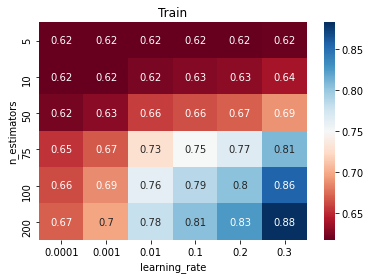

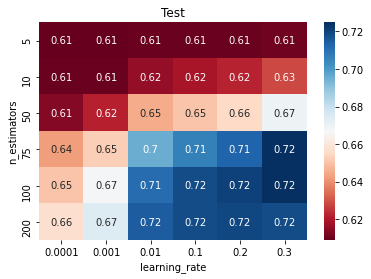

In [46]:
kx,y,z = param['n_estimators'],param['learning_rate'],model_.cv_results_['mean_train_score']
import itertools
import seaborn as sns
plot_data = pd.DataFrame(list(itertools.product(x,y)),columns=['n_estimators','learning_rate'])
plot_data['AUC_Train'] = z
plot_data['AUC_Test'] = model_.cv_results_['mean_test_score']

#plot_data['tr_cl']= '#EF553B'
#plot_data['ts_cl']= '#FF6692'

# https://stackoverflow.com/questions/45470882/x-y-z-array-data-to-heatmap/45660022

pivotted_tr= plot_data.pivot('n_estimators','learning_rate','AUC_Train')
sns.heatmap(pivotted_tr,cmap='RdBu',annot=True)
plt.title('Train')
plt.show()

pivotted_ts= plot_data.pivot('n_estimators','learning_rate','AUC_Test')
sns.heatmap(pivotted_ts,cmap='RdBu',annot=True)
plt.title('Test')
plt.show()

In [47]:
import seaborn as sns
def plot_roc(model,x_train,x_test,y_train,y_test):
  tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1])
  ts_fpr, ts_tpr, ts_thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
  plt.plot(tr_fpr,tr_tpr,'-o',label='train')
  plt.plot(ts_fpr,ts_tpr,'-o',label='test')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.legend()
  plt.grid()
  plt.title('ROC_Curve')
  plt.show()
  
  # https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
  #labels = ['project_not_accepted','project_accepted']
  from sklearn.metrics import plot_confusion_matrix
  cm = plot_confusion_matrix(model,x_test,y_test,cmap='RdBu')
  plt.title('Confusion_Matrix')
  
  return 

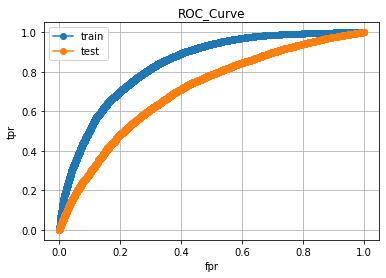

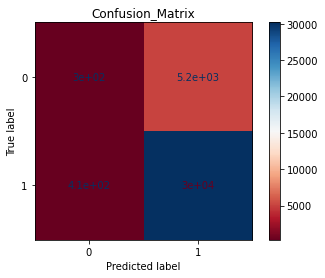

In [53]:
plot_roc(model=final_clf_,x_train=final_data_x_1,x_test=x_ts_1,y_train=final_data_y_1,y_test=y_test)

In [54]:
x = pd.DataFrame(y_test,columns=['y_test'],index=list(x_test.index))
x['y_pred_0'] = final_clf_.predict_proba(x_ts_1)[:,0]
x['y_pred_1'] = final_clf_.predict_proba(x_ts_1)[:,1]
x['cl'] = final_clf_.predict(x_ts_1)

a=x[x['y_test']==1]
b = a[a['cl']==0]

fp_points = x_test[x_test.index.isin(b.index)]

In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
print('AUC_test',roc_auc_score(y_test,final_clf_.predict_proba(x_ts_1)[:,1]))
print('AUC_train',roc_auc_score(final_data_y_1,final_clf_.predict_proba(final_data_x_1)[:,1]))

AUC_test 0.7195585810328031
AUC_train 0.8491822393294556


In [56]:
auc_test_tfidf = roc_auc_score(y_test,final_clf_.predict_proba(x_ts)[:,1])

In [57]:
y_pred_ts = final_clf_.predict(x_ts) 

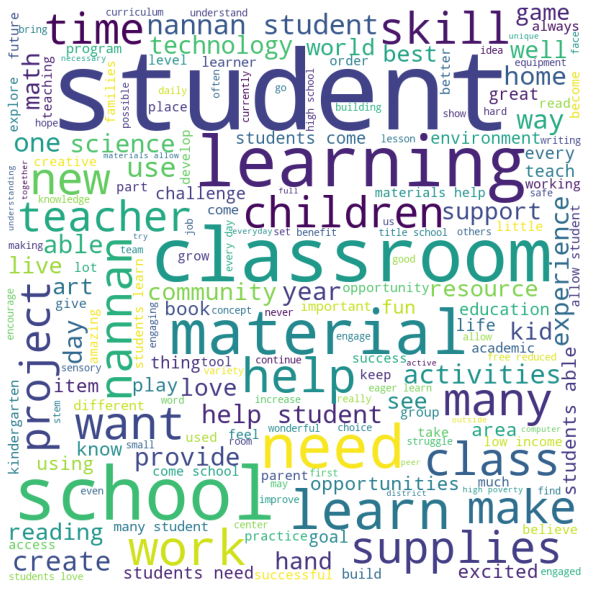

In [35]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
df = fp_points['essay']

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.values: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


##SET-2

In [ ]:
#please use below code to load glove vectors 
with open('/content/drive/MyDrive/AAIC/Assignments/13.Apply GBDT on Donors Choose dataset/practice/glove_vectors', 'rb') as f:
    model_glove = pickle.load(f)
    glove_words =  set(model_glove.keys())


In [ ]:
preprocessed_essays = x_train['essay'].values

In [38]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
def tfidf_w2v(preprocessed_essays,glove_words,tfidf_words,dictionary,model_glove):
  # average Word2Vec
  # compute average word2vec for each review.
  tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(preprocessed_essays): # for each review/sentence
      vector = np.zeros(300) # as word vectors are of zero length
      tf_idf_weight =0; # num of words with a valid vector in the sentence/review
      for word in sentence.split(): # for each word in a review/sentence
          if (word in glove_words) and (word in tfidf_words):
              vec = model_glove[word] # getting the vector for each word
              # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
              tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
              vector += (vec * tf_idf) # calculating tfidf weighted w2v
              tf_idf_weight += tf_idf
      if tf_idf_weight != 0:
          vector /= tf_idf_weight
      tfidf_w2v_vectors.append(vector)

  #print(len(tfidf_w2v_vectors))
  #print(len(tfidf_w2v_vectors[0]))
  return csr_matrix(tfidf_w2v_vectors)


In [58]:
tfidf_w2v_feat_tr = tfidf_w2v(preprocessed_essays,glove_words,tfidf_words,dictionary,model_glove)
x_tr_tfidf = hstack((cat_feat_tr,num_feat_tr,tfidf_w2v_feat_tr,senti_score_feat_csr_tr))


In [59]:
preprocessed_essays = x_test['essay'].values
tfidf_w2v_feat_ts = tfidf_w2v(preprocessed_essays,glove_words,tfidf_words,dictionary,model_glove)
x_ts_tfidf = hstack((cat_feat_ts,num_feat_ts,tfidf_w2v_feat_ts,senti_score_feat_csr_ts))

In [ ]:
Counter(y_train)

Counter({0: 11083, 1: 62113})

In [60]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x_tr_tfidf, y_train)

In [ ]:
Counter(y_resampled)

Counter({0: 62113, 1: 62113})

In [61]:
final_data_x = x_resampled[:49690,:]
final_data_y = y_resampled[:49690]

In [62]:
clf = clf = xgb.XGBClassifier()#GradientBoostingClassifier()
param = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         'n_estimators':[5,10,50, 75, 100, 200]}
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(estimator=clf,param_grid=param,cv=5,return_train_score=True,verbose=2,n_jobs=-1,scoring='roc_auc')
model.fit(final_data_x, final_data_y)
print(model.best_params_,model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 145.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 172.2min finished


{'learning_rate': 0.1, 'n_estimators': 200} {'learning_rate': 0.1, 'n_estimators': 200}


In [77]:
print(model.best_params_)

{'learning_rate': 0.1, 'n_estimators': 200}


In [78]:
final_clf = xgb.XGBClassifier(learning_rate=model.best_params_['learning_rate'],
                                 n_estimators=model.best_params_['n_estimators'])

#final_clf = GradientBoostingClassifier(learning_rate=0.1,
#                                 n_estimators=200)

final_clf.fit(final_data_x, final_data_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve
print('AUC_test',roc_auc_score(y_test,final_clf.predict_proba(x_ts_tfidf)[:,1]))
print('AUC_train',roc_auc_score(final_data_y,final_clf.predict_proba(final_data_x)[:,1]))

AUC_test 0.7048493398071545
AUC_train 0.7970999523322733


In [80]:
auc_test_tfidf_w2v = roc_auc_score(y_test,final_clf.predict_proba(x_ts_tfidf)[:,1])

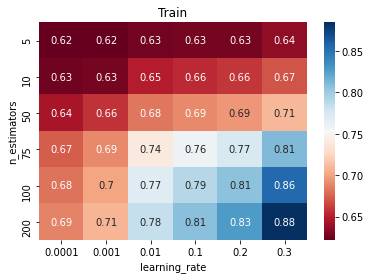

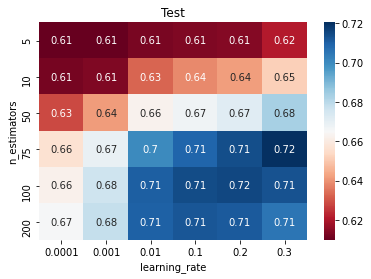

In [81]:
import numpy as np
import pandas as pd

param = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         'n_estimators':[5,10,50, 75, 100, 200]}

x,y,z = param['n_estimators'],param['learning_rate'],model.cv_results_['mean_train_score']
import itertools
plot_data = pd.DataFrame(list(itertools.product(x,y)),columns=['n_estimators','learning_rate'])
plot_data['AUC_Train'] = z
plot_data['AUC_Test'] = model.cv_results_['mean_test_score']

#plot_data['tr_cl']= '#EF553B'
#plot_data['ts_cl']= '#FF6692'

# https://stackoverflow.com/questions/45470882/x-y-z-array-data-to-heatmap/45660022

pivotted= plot_data.pivot('n_estimators','learning_rate','AUC_Train')
import seaborn as sns
sns.heatmap(pivotted,cmap='RdBu',annot=True,)
plt.title('Train')
plt.show()
print('\n')
pivotted_ts= plot_data.pivot('n_estimators','learning_rate','AUC_Test')
import seaborn as sns
sns.heatmap(pivotted_ts,cmap='RdBu',annot=True,)
plt.title('Test')
plt.show()

In [82]:
import seaborn as sns
def plot_roc(model,x_train,x_test,y_train,y_test):
  tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1])
  ts_fpr, ts_tpr, ts_thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
  plt.plot(tr_fpr,tr_tpr,'-o',label='train')
  plt.plot(ts_fpr,ts_tpr,'-o',label='test')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.legend()
  plt.grid()
  plt.title('ROC_Curve')
  plt.show()
  
  # https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
  #labels = ['project_not_accepted','project_accepted']
  from sklearn.metrics import plot_confusion_matrix
  cm = plot_confusion_matrix(model,x_test,y_test,cmap='RdBu')
  plt.title('Confusion_Matrix')
  
  return 

In [ ]:
final_clf.feature_importances_.shape
print(x_ts_tfidf.shape)

(36052, 316)


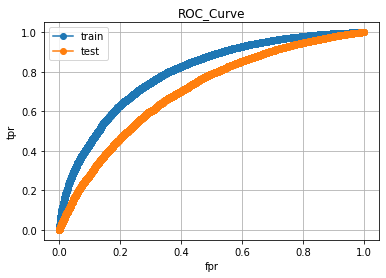

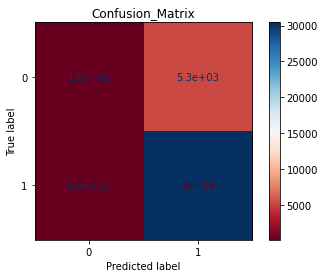

In [83]:
plot_roc(model=final_clf,x_train=final_data_x,x_test=x_ts_tfidf,y_train=final_data_y,y_test=y_test)

In [84]:
x = pd.DataFrame(y_test,columns=['y_test'],index=list(x_test.index))
x['y_pred_0'] = final_clf.predict_proba(x_ts_tfidf)[:,0]
x['y_pred_1'] = final_clf.predict_proba(x_ts_tfidf)[:,1]
x['cl'] = final_clf.predict(x_ts_tfidf)

a=x[x['y_test']==1]
b = a[a['cl']==0]

fp_points = x_test[x_test.index.isin(b.index)]

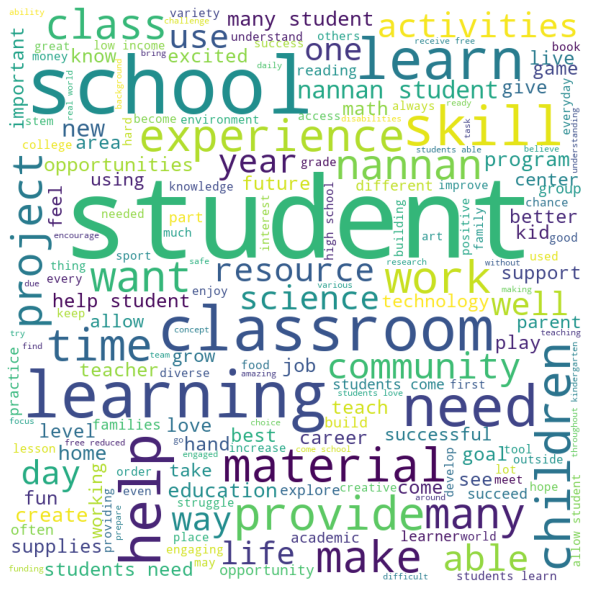

In [ ]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
df = fp_points['essay']

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.values: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [86]:
#https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model' , 'Hyper parameter' , 'AUC'])
#print(clf.best_estimator_,'\n',auc_test)
t.add_row(['TFIDF', 'GBDT',model_.best_params_,auc_test_tfidf])
t.add_row(['TFIDF_W2V', 'GBDT',model.best_params_,auc_test_tfidf_w2v])
#t.add_row(['TFIDF', 'DT',(model_2.best_params_),auc_test_tfidf_2])
print(t)

+------------+-------+---------------------------------------------+--------------------+
| Vectorizer | Model |               Hyper parameter               |        AUC         |
+------------+-------+---------------------------------------------+--------------------+
|   TFIDF    |  GBDT | {'learning_rate': 0.2, 'n_estimators': 200} | 0.7069157149506387 |
| TFIDF_W2V  |  GBDT | {'learning_rate': 0.1, 'n_estimators': 200} | 0.7048493398071545 |
+------------+-------+---------------------------------------------+--------------------+
